!pip install azure-monitor-query
!pip install azure-identity

# Available Azure OpenAI Metrics

This notebook demonstrates how to query Azure OpenAI metrics using the Azure Monitor Query client. Below is a comprehensive list of available metrics for Azure OpenAI services.
Reference: https://learn.microsoft.com/en-us/azure/ai-foundry/openai/monitor-openai-reference

## Most Important Metrics for Azure OpenAI

### Core Azure OpenAI Metrics
- **Azure OpenAI Requests** (`AzureOpenAIRequests`) - Number of API calls
- **Active Tokens** (`ActiveTokens`) - Total tokens minus cached tokens  
- **Generated Completion Tokens** (`GeneratedTokens`) - Output tokens from model
- **Processed FineTuned Training Hours** (`FineTunedTrainingHours`) - Training hours for fine-tuned models
- **Processed Inference Tokens** (`TokenTransaction`) - Total input + output tokens
- **Processed Prompt Tokens** (`ProcessedPromptTokens`) - Input tokens to model
- **Provisioned-managed Utilization V2** (`AzureOpenAIProvisionedManagedUtilizationV2`) - PTU utilization %
- **Prompt Token Cache Match Rate** (`AzureOpenAIContextTokensCacheMatchRate`) - Cache hit rate %
- **Time to Response** (`AzureOpenAITimeToResponse`) - Latency for first response
- **Time Between Tokens** (`AzureOpenAINormalizedTBTInMS`) - Token generation rate
- **Time to Last Byte** (`AzureOpenAITTLTInMS`) - Time for complete response
- **Normalized Time to First Byte** (`AzureOpenAINormalizedTTFTInMS`) - Time to first byte
- **Tokens per Second** (`AzureOpenAITokenPerSecond`) - Generation speed

### Content Safety Metrics
- **Blocked Volume** (`RAIRejectedRequests`) - Requests blocked by content filter
- **Harmful Volume Detected** (`RAIHarmfulRequests`) - Harmful content detected
- **Potential Abusive User Count** (`RAIAbusiveUsersCount`) - Users flagged as potentially abusive
- **Safety System Event** (`RAISystemEvent`) - Safety monitoring events
- **Total Volume Sent for Safety Check** (`RAITotalRequests`) - All requests checked

## Complete Metrics List by Category

### Azure OpenAI - HTTP Requests
| Metric | REST API Name | Unit | Description |
|--------|---------------|------|-------------|
| Azure OpenAI AvailabilityRate | `AzureOpenAIAvailabilityRate` | Percent | Service availability percentage |
| Azure OpenAI Requests | `AzureOpenAIRequests` | Count | API call count with dimensions for filtering |

### Azure OpenAI - Latency  
| Metric | REST API Name | Unit | Description |
|--------|---------------|------|-------------|
| Time Between Token | `AzureOpenAINormalizedTBTInMS` | MilliSeconds | Token generation rate for streaming |
| Normalized Time to First Byte | `AzureOpenAINormalizedTTFTInMS` | MilliSeconds | Time to first response byte |
| Time to Response | `AzureOpenAITimeToResponse` | MilliSeconds | Latency for first response |
| Tokens Per Second | `AzureOpenAITokenPerSecond` | Count | Generation speed |
| Time to Last Byte | `AzureOpenAITTLTInMS` | MilliSeconds | Complete response time |

### Azure OpenAI - Usage
| Metric | REST API Name | Unit | Description |
|--------|---------------|------|-------------|
| Active Tokens | `ActiveTokens` | Count | Total tokens minus cached tokens |
| Audio Completion Tokens | `AudioCompletionTokens` | Count | Audio output tokens |
| Audio Prompt Tokens | `AudioPromptTokens` | Count | Audio input tokens |
| Prompt Token Cache Match Rate | `AzureOpenAIContextTokensCacheMatchRate` | Percent | Cache hit percentage |
| Provisioned-managed Utilization V2 | `AzureOpenAIProvisionedManagedUtilizationV2` | Percent | PTU utilization (recommended) |
| Provisioned-managed Utilization | `AzureOpenAIProvisionedManagedUtilization` | Percent | PTU utilization (deprecated) |
| Processed FineTuned Training Hours | `FineTunedTrainingHours` | Count | Fine-tuning training hours |
| Generated Completion Tokens | `GeneratedTokens` | Count | Model output tokens |
| Processed Prompt Tokens | `ProcessedPromptTokens` | Count | Model input tokens |
| Processed Inference Tokens | `TokenTransaction` | Count | Total tokens (input + output) |

### ContentSafety - Risks & Safety
| Metric | REST API Name | Unit | Description |
|--------|---------------|------|-------------|
| Potentially Abusive User Count | `RAIAbusiveUsersCount` | Count | Users flagged as potentially abusive |
| Harmful Volume Detected | `RAIHarmfulRequests` | Count | Harmful content detected |
| Blocked Volume | `RAIRejectedRequests` | Count | Requests blocked by filters |
| Safety System Event | `RAISystemEvent` | Count | Safety monitoring events |
| Total Volume Sent For Safety Check | `RAITotalRequests` | Count | All requests processed by safety |

### Legacy Cognitive Services Metrics (Not Recommended for Azure OpenAI)
⚠️ **Note**: These metrics are legacy and not recommended for Azure OpenAI:
- `TotalCalls`, `SuccessfulCalls`, `ClientErrors`, `ServerErrors`
- `BlockedCalls`, `Latency`, `DataIn`, `DataOut`
- Use the Azure OpenAI specific metrics above instead

## Common Dimensions for Filtering
- **ModelDeploymentName** - Filter by specific model deployment
- **ModelName** - Filter by model (e.g., gpt-4, gpt-35-turbo)
- **ModelVersion** - Filter by model version
- **Region** - Filter by Azure region
- **StatusCode** - Filter by HTTP status codes
- **StreamType** - Filter by streaming vs non-streaming requests
- **ApiName** - Filter by API endpoint
- **OperationName** - Filter by operation type

In [1]:
!az login --tenant 16b3c013-d300-468d-ac64-7eda0820b6d3

[


  {
    "cloudName": "AzureCloud",
    "homeTenantId": "16b3c013-d300-468d-ac64-7eda0820b6d3",
    "id": "6025ba02-1dfd-407f-b358-88f811c7c7aa",
    "isDefault": true,
    "managedByTenants": [
      {
        "tenantId": "2f4a9838-26b7-47ee-be60-ccc1fdec5953"
      },
      {
        "tenantId": "72f988bf-86f1-41af-91ab-2d7cd011db47"
      }
    ],
    "name": "MCAPS-Hybrid-REQ-40165-2022-JakeWang",
    "state": "Enabled",
    "tenantId": "16b3c013-d300-468d-ac64-7eda0820b6d3",
    "user": {
      "name": "jacwang@microsoft.com",
      "type": "user"
    }
  },
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "16b3c013-d300-468d-ac64-7eda0820b6d3",
    "id": "997499f7-6523-407d-ac0c-d9ee154f1df1",
    "isDefault": false,
    "managedByTenants": [
      {
        "tenantId": "72f988bf-86f1-41af-91ab-2d7cd011db47"
      }
    ],
    "name": "MCAPS-Hybrid-REQ-41592-2022-KamalAbburi",
    "state": "Enabled",
    "tenantId": "16b3c013-d300-468d-ac64-7eda0820b6d3",
    "user": {
    

In [2]:
import os
from datetime import timedelta, datetime
from azure.monitor.query import MetricsQueryClient
from azure.identity import DefaultAzureCredential

credential = DefaultAzureCredential()
metrics_client = MetricsQueryClient(credential)

Ensure your service principal has "Monitor Reader" Role on Cognitive Service Resource
https://github.com/Azure/azure-sdk-for-python/blob/main/sdk/monitor/azure-monitor-query/README.md


In [3]:
from dotenv import load_dotenv
load_dotenv()

# Set environment variables for Azure credentials
# os.environ["AZURE_CLIENT_ID"] = "XXXXXX"
# os.environ["AZURE_TENANT_ID"]= "XXXXXX"
# os.environ["AZURE_CLIENT_SECRET"] = "XXXXXX"

SubscriptionID = os.environ.get("AZURE_SUBSCRIPTION_ID")
ResourceGroupName = os.environ.get("AZURE_RESOURCE_GROUP_NAME")
AOAIResource = os.environ.get("AZURE_AOAI_RESOURCE_NAME")


In [4]:
resource_id = f"/subscriptions/{SubscriptionID}/RESOURCEGROUPS/{ResourceGroupName}/PROVIDERS/MICROSOFT.COGNITIVESERVICES/ACCOUNTS/{AOAIResource}/"
print(f"Resource ID: {resource_id}")


Resource ID: /subscriptions/6025ba02-1dfd-407f-b358-88f811c7c7aa/RESOURCEGROUPS/sc1-oai/PROVIDERS/MICROSOFT.COGNITIVESERVICES/ACCOUNTS/eu2-oai/


In [5]:
client = metrics_client
start_time = datetime(2025, 8, 10)
end_time =  datetime(2025, 8, 18)
duration = timedelta(days=7)
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["AzureOpenAIRequests"],
    timespan=(start_time, duration),
    filter="ModelDeploymentName eq '*'",
    granularity=timedelta(days=1)
    
    )


Datetime with no tzinfo will be considered UTC.


In [19]:
metrics_data

[{'name': 'AzureOpenAIRequests',
  'timeseries': [{'metadata_values': {'modeldeploymentname': 'o4-mini'},
    'data': [{'timestamp': '2025-08-10T00:00:00+00:00',
      'average': None,
      'minimum': None,
      'maximum': None,
      'total': 0,
      'count': None},
     {'timestamp': '2025-08-11T00:00:00+00:00',
      'average': None,
      'minimum': None,
      'maximum': None,
      'total': 0,
      'count': None},
     {'timestamp': '2025-08-12T00:00:00+00:00',
      'average': None,
      'minimum': None,
      'maximum': None,
      'total': 0,
      'count': None},
     {'timestamp': '2025-08-13T00:00:00+00:00',
      'average': None,
      'minimum': None,
      'maximum': None,
      'total': 0,
      'count': None},
     {'timestamp': '2025-08-14T00:00:00+00:00',
      'average': None,
      'minimum': None,
      'maximum': None,
      'total': 0,
      'count': None},
     {'timestamp': '2025-08-15T00:00:00+00:00',
      'average': None,
      'minimum': None,
      '

In [ ]:
# Flatten metrics data to a single array of data points with all fields
import json
from datetime import datetime
flat_metrics = []

def convert(obj):
    if isinstance(obj, datetime):
        return obj.isoformat()
    return obj

for metric in response.metrics:
    metric_name = metric.name
    for time_series_element in metric.timeseries:
        # Try to extract deployment name from metadata_values
        deployment_name = None
        meta = time_series_element.metadata_values
        if isinstance(meta, dict):
            deployment_name = meta.get('ModelDeploymentName', None)
        elif isinstance(meta, list):
            for m in meta:
                if isinstance(m, dict) and 'ModelDeploymentName' in m:
                    deployment_name = m['ModelDeploymentName']
                    break
        for value in time_series_element.data:
            flat_metrics.append({
                "timestamp": convert(getattr(value, 'timestamp', None)),
                "average": getattr(value, 'average', None),
                "minimum": getattr(value, 'minimum', None),
                "maximum": getattr(value, 'maximum', None),
                "total": getattr(value, 'total', 0),
                "count": getattr(value, 'count', None),
                "metric_name": metric_name,
                "ModelDeploymentName": deployment_name
            })

json_output = json.dumps(flat_metrics, indent=2)

In [18]:
flat_metrics

[{'timestamp': '2025-08-10T00:00:00+00:00',
  'total': 0,
  'metric_name': 'AzureOpenAIRequests',
  'ModelDeploymentName': None},
 {'timestamp': '2025-08-11T00:00:00+00:00',
  'total': 0,
  'metric_name': 'AzureOpenAIRequests',
  'ModelDeploymentName': None},
 {'timestamp': '2025-08-12T00:00:00+00:00',
  'total': 0,
  'metric_name': 'AzureOpenAIRequests',
  'ModelDeploymentName': None},
 {'timestamp': '2025-08-13T00:00:00+00:00',
  'total': 0,
  'metric_name': 'AzureOpenAIRequests',
  'ModelDeploymentName': None},
 {'timestamp': '2025-08-14T00:00:00+00:00',
  'total': 0,
  'metric_name': 'AzureOpenAIRequests',
  'ModelDeploymentName': None},
 {'timestamp': '2025-08-15T00:00:00+00:00',
  'total': 54,
  'metric_name': 'AzureOpenAIRequests',
  'ModelDeploymentName': None},
 {'timestamp': '2025-08-16T00:00:00+00:00',
  'total': 52,
  'metric_name': 'AzureOpenAIRequests',
  'ModelDeploymentName': None},
 {'timestamp': '2025-08-10T00:00:00+00:00',
  'total': 0,
  'metric_name': 'AzureOpenAIR

NameError: name 'metric' is not defined

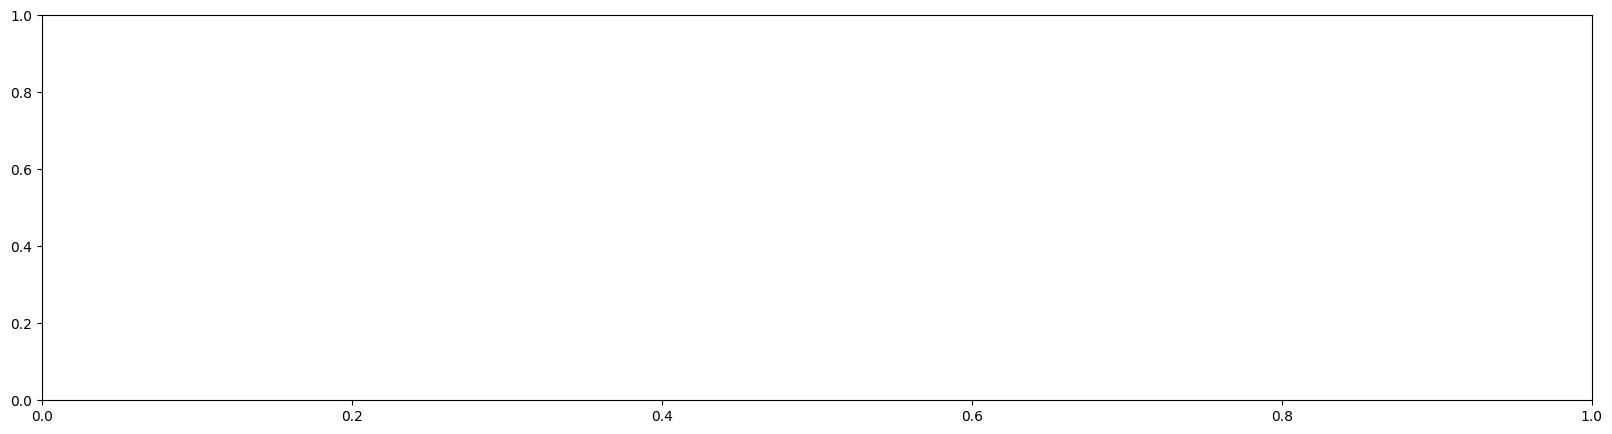

In [5]:
import matplotlib.pyplot as plt

# Sample data
fig, ax = plt.subplots(figsize=(20, 5))

for time_series_element in metric.timeseries:
    data = []
    label = time_series_element.metadata_values
    for metric_value in time_series_element.data:
        data.append(metric_value)
        
    # Extract x and y values
    x = [d.timestamp for d in data]
    y = [d.total for d in data]
    ax.plot(x, y, label =label) 
    



# Add labels and title
# Add labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Calls')
ax.set_title('Total Calls')
# Create plot

ax.legend() 

plt.show()


In [19]:
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["Latency"],
    timespan=(start_time, duration),
    filter="RateLimitKey eq '*'",
    granularity=timedelta(days=1)
    )

Datetime with no tzinfo will be considered UTC.


In [ ]:
for metric in response.metrics:
    print(metric.name)
    for time_series_element in metric.timeseries:
        print(time_series_element.metadata_values)
        for metric_value in time_series_element.data:
            print(metric_value.__dict__)

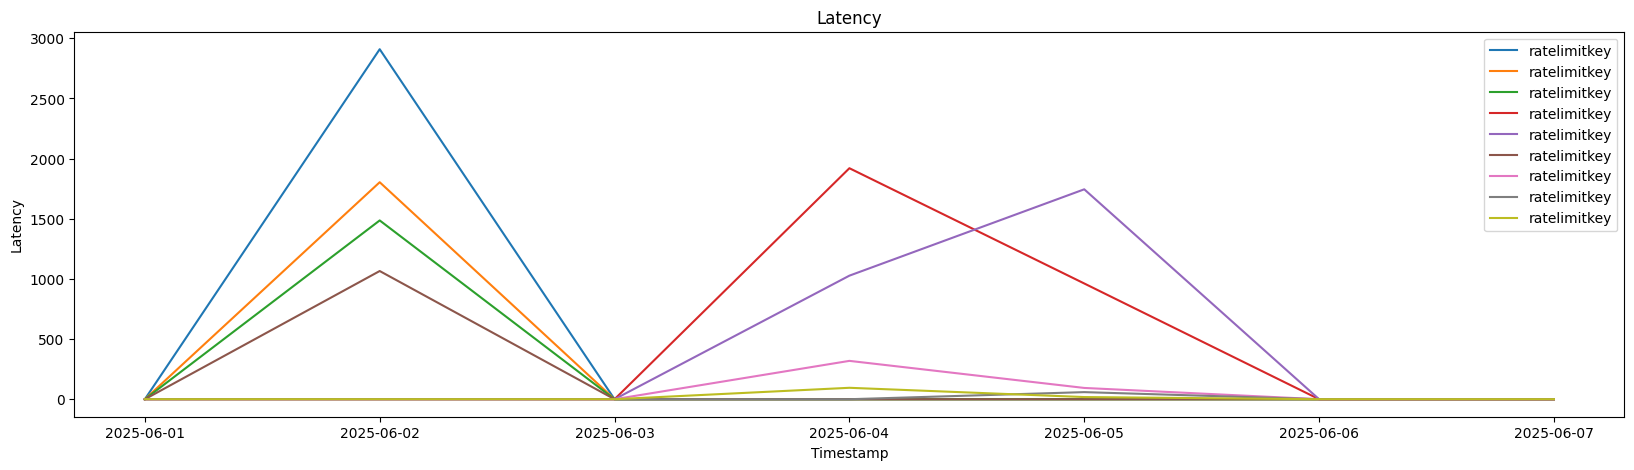

In [21]:
import matplotlib.pyplot as plt

# Sample data
fig, ax = plt.subplots(figsize=(20, 5))

for time_series_element in metric.timeseries:
    data = []
    label = time_series_element.metadata_values
    for metric_value in time_series_element.data:
        data.append(metric_value)
        
    # Extract x and y values
    x = [d.timestamp for d in data]
    y = [d.average if d.average else 0 for d in data]
    ax.plot(x, y, label =label) 
    



# Add labels and title
# Add labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Latency')
ax.set_title('Latency')
# Create plot

ax.legend() 

plt.show()

In [22]:
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["ProcessedPromptTokens"],
    timespan=(start_time, duration),
    filter="FeatureName eq '*'",
    granularity=timedelta(days=1)
    )

Datetime with no tzinfo will be considered UTC.


In [ ]:
for metric in response.metrics:
    print(metric.name)
    for time_series_element in metric.timeseries:
        print(time_series_element.metadata_values)
        for metric_value in time_series_element.data:
            print(metric_value.__dict__)

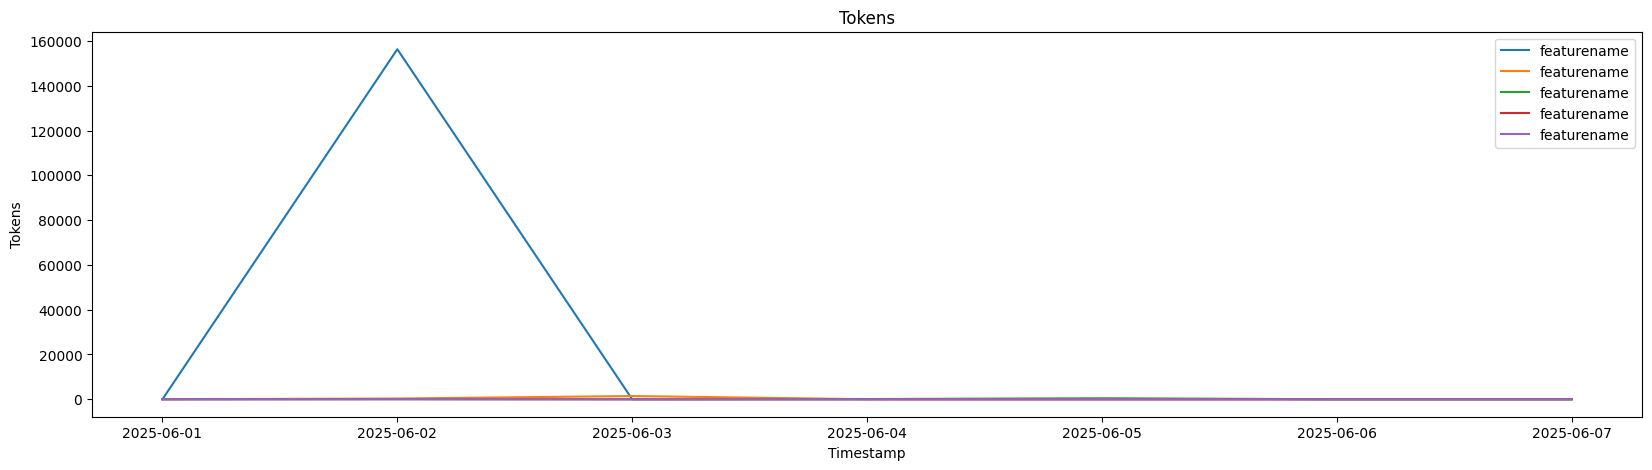

In [24]:
# Sample data
fig, ax = plt.subplots(figsize=(20, 5))

for time_series_element in metric.timeseries:
    data = []
    label = time_series_element.metadata_values
    for metric_value in time_series_element.data:
        data.append(metric_value)
        
    # Extract x and y values
    x = [d.timestamp for d in data]
    y = [d.total if d.total else 0 for d in data]
    ax.plot(x, y, label =label) 
    



# Add labels and title
# Add labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Tokens')
ax.set_title('Tokens')
# Create plot

ax.legend() 

plt.show()

## Additional Azure OpenAI Metrics Examples

Below are examples of querying other important Azure OpenAI metrics:

In [ ]:
# Query Azure OpenAI Requests (recommended over legacy TotalCalls)
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["AzureOpenAIRequests"],
    timespan=(start_time, duration),
    filter="ModelDeploymentName eq '*'",  # Filter by deployment name
    granularity=timedelta(hours=1)
)

for metric in response.metrics:
    print(f"Metric: {metric.name}")
    for time_series_element in metric.timeseries:
        print(f"Dimensions: {time_series_element.metadata_values}")
        for metric_value in time_series_element.data:
            if metric_value.total:
                print(f"  {metric_value.timestamp}: {metric_value.total} requests")

In [26]:
# Query Active Tokens (for PTU deployments)
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["ActiveTokens"],
    timespan=(start_time, duration),
    filter="ModelDeploymentName eq '*'",
    granularity=timedelta(hours=1)
)

for metric in response.metrics:
    print(f"Metric: {metric.name}")
    for time_series_element in metric.timeseries:
        print(f"Dimensions: {time_series_element.metadata_values}")
        for metric_value in time_series_element.data:
            if metric_value.total:
                print(f"  {metric_value.timestamp}: {metric_value.total} active tokens")

Datetime with no tzinfo will be considered UTC.


Metric: ActiveTokens


In [27]:
# Query Provisioned-managed Utilization V2 (recommended over deprecated version)
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["AzureOpenAIProvisionedManagedUtilizationV2"],
    timespan=(start_time, duration),
    filter="ModelDeploymentName eq '*'",
    granularity=timedelta(hours=1)
)

for metric in response.metrics:
    print(f"Metric: {metric.name}")
    for time_series_element in metric.timeseries:
        print(f"Dimensions: {time_series_element.metadata_values}")
        for metric_value in time_series_element.data:
            if metric_value.average is not None:
                print(f"  {metric_value.timestamp}: {metric_value.average:.2f}% utilization")

Datetime with no tzinfo will be considered UTC.


Metric: AzureOpenAIProvisionedManagedUtilizationV2


In [28]:
# Query Content Safety Metrics - Blocked Volume
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["RAIRejectedRequests"],  # Blocked Volume
    timespan=(start_time, duration),
    filter="ModelDeploymentName eq '*'",
    granularity=timedelta(hours=1)
)

print("Blocked Volume (Content Safety):")
for metric in response.metrics:
    print(f"Metric: {metric.name}")
    for time_series_element in metric.timeseries:
        print(f"Dimensions: {time_series_element.metadata_values}")
        for metric_value in time_series_element.data:
            if metric_value.total:
                print(f"  {metric_value.timestamp}: {metric_value.total} blocked requests")

Datetime with no tzinfo will be considered UTC.


Blocked Volume (Content Safety):
Metric: RAIRejectedRequests


In [ ]:
# Query Time to Response (recommended latency metric)
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["AzureOpenAITimeToResponse"],
    timespan=(start_time, duration),
    filter="ModelDeploymentName eq '*'",
    granularity=timedelta(hours=1)
)

print("Time to Response (Latency):")
for metric in response.metrics:
    print(f"Metric: {metric.name}")
    for time_series_element in metric.timeseries:
        print(f"Dimensions: {time_series_element.metadata_values}")
        for metric_value in time_series_element.data:
            if metric_value.average is not None:
                print(f"  {metric_value.timestamp}: {metric_value.average:.2f}ms average response time")

In [ ]:
# Query Multiple Metrics Efficiently
# You can query multiple metrics in a single call
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=[
        "AzureOpenAIRequests",
        "GeneratedTokens", 
        "ProcessedPromptTokens",
        "AzureOpenAITimeToResponse"
    ],
    timespan=(start_time, duration),
    filter="ModelDeploymentName eq '*'",
    granularity=timedelta(hours=1)
)

print("Multiple Metrics Summary:")
for metric in response.metrics:
    print(f"\n--- {metric.name} ---")
    for time_series_element in metric.timeseries:
        print(f"Dimensions: {time_series_element.metadata_values}")
        total_value = 0
        count = 0
        for metric_value in time_series_element.data:
            if metric_value.total:
                total_value += metric_value.total
                count += 1
            elif metric_value.average:
                total_value += metric_value.average
                count += 1
        
        if count > 0:
            avg_value = total_value / count
            print(f"  Average: {avg_value:.2f}")
            print(f"  Data Points: {count}")

## Important Notes and Best Practices

### ⚠️ Deprecated Metrics
- **Avoid using legacy Cognitive Services metrics** like `TotalCalls`, `Latency`, `SuccessfulCalls` for Azure OpenAI
- **Use `AzureOpenAIProvisionedManagedUtilizationV2`** instead of the deprecated `AzureOpenAIProvisionedManagedUtilization`

### 🎯 Recommended Metrics by Use Case

**For Monitoring Request Volume:**
- `AzureOpenAIRequests` (recommended over `TotalCalls`)

**For Monitoring Token Usage:**
- `ProcessedPromptTokens` - Input tokens
- `GeneratedTokens` - Output tokens  
- `TokenTransaction` - Total tokens (input + output)
- `ActiveTokens` - For PTU deployments

**For Monitoring Latency:**
- `AzureOpenAITimeToResponse` - Primary latency metric
- `AzureOpenAITTLTInMS` - Time to last byte
- `AzureOpenAINormalizedTTFTInMS` - Time to first byte

**For Monitoring PTU Utilization:**
- `AzureOpenAIProvisionedManagedUtilizationV2` - Current recommended metric

**For Monitoring Content Safety:**
- `RAIRejectedRequests` - Blocked requests
- `RAIHarmfulRequests` - Harmful content detected
- `RAITotalRequests` - Total requests processed

### 📊 Key Dimensions for Filtering
- **ModelDeploymentName** - Essential for multi-model deployments
- **ModelName** - Filter by specific models (gpt-4, gpt-35-turbo, etc.)
- **StatusCode** - Filter by success/error status
- **StreamType** - Streaming vs non-streaming requests
- **Region** - For multi-region deployments

### 🔍 Granularity Recommendations
- **Real-time monitoring**: PT1M (1 minute)
- **Hourly analysis**: PT1H (1 hour) 
- **Daily trends**: P1D (1 day)

### 📅 Metric Retention
- Metrics are retained according to Azure Monitor retention policies
- Plan your historical analysis accordingly